In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import time, pytz

In [2]:
stromprod = pd.read_csv('../data/strom-stg-bismaerz25.csv', sep=';', encoding='utf-8', low_memory=False, parse_dates=['DateTime (Local Time)'])

In [3]:
import scienceplots
import matplotlib.ticker as ticker
plt.style.use(['science'])
FIG_WIDTH = 7.5  # width of figure in inches (a4 width)
TARGET_FOLDER = "/home/masc12/dev/masc12-mthesis/eda/solar-eda/plots/"

# exploration

In [4]:
stg_werkhof = stromprod[(stromprod["Name"] == "Werkhof St.Galler Stadtwerke") & (stromprod["Name des Smart-Me Zählers"] == "PV Steinachstrasse 49")].copy()
stg_werkhof['datetime'] = stg_werkhof["DateTime (Local Time)"].apply(lambda x: dt.datetime(x.year,x.month,x.day,x.hour,x.minute))
stg_werkhof

,DateTime (Local Time),smart-me ID,Name,Name des Smart-Me Zählers,Additional Energy Import,Active Energy Import Total,Additional Energy Export,Active Energy Export Total,Unit,Link,Modultyp,Leistung in kWp,Anzahl Module,Leistung / Modul in Wp,Wechselrichterleistung in kVA,Fläche in m2,Geo Shape,Geo Point,datetime
6908,2023-01-07 23:30:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,11932.695,0.000,3.246061e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2023-01-07 23:30:00
6910,2023-01-08 02:15:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,11932.695,0.000,3.246061e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2023-01-08 02:15:00
6912,2023-01-08 02:45:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,11932.695,0.000,3.246061e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2023-01-08 02:45:00
6914,2023-01-08 03:00:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,11932.695,0.000,3.246061e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2023-01-08 03:00:00
6916,2023-01-08 03:15:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,11932.695,0.000,3.246061e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2023-01-08 03:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935347,2025-03-13 08:00:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.147,12719.511,20.411,6.942829e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2025-03-13 08:00:00
935348,2025-03-13 09:15:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.077,12719.588,2.209,6.942868e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2025-03-13 09:15:00
935349,2025-03-13 10:30:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,12719.668,275.637,6.942968e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2025-03-13 10:30:00
935350,2025-03-13 11:30:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,0.000,12719.668,177.339,6.943066e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2025-03-13 11:30:00


In [5]:
stg_werkhof[stg_werkhof["Additional Energy Export"] > 10_000_000]

,DateTime (Local Time),smart-me ID,Name,Name des Smart-Me Zählers,Additional Energy Import,Active Energy Import Total,Additional Energy Export,Active Energy Export Total,Unit,Link,Modultyp,Leistung in kWp,Anzahl Module,Leistung / Modul in Wp,Wechselrichterleistung in kVA,Fläche in m2,Geo Shape,Geo Point,datetime
339444,2024-08-01 00:00:00+02:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,12348.196,12532.135,3.382808e+07,6.140194e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2024-08-01
413388,2023-01-01 00:00:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,11765.766,11928.606,1.169483e+07,3.235235e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2023-01-01
796728,2025-01-01 00:00:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,12474.352,12662.326,3.910873e+07,6.743340e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2025-01-01
872546,2024-01-01 00:00:00+01:00,115a4cd6-c5b2-d6a6-14dc-b03078644337,Werkhof St.Galler Stadtwerke,PV Steinachstrasse 49,12076.213,12252.067,2.548245e+07,5.055871e+07,Wh,https://sgsw.solarlog-web.ch/40472.html,Siemens SM110,21.78,198,110,20.0,178,"{""coordinates"": [[[9.384719638540817, 47.43109...","47.4312365481, 9.38471976238",2024-01-01


In [6]:
stg_werkhof.drop(stg_werkhof[stg_werkhof["Additional Energy Export"] > 10_000_000].index, inplace=True) # remove outliers
len(stg_werkhof)

77045

In [7]:
freq = stg_werkhof[["datetime", "Additional Energy Export"]].copy()
freq.columns = ["datetime", "energy-produced-Wh"]
freq.set_index('datetime', inplace=True)
freq.sort_index(inplace=True)

diffs = freq.index.to_series().diff().dt.total_seconds() / 60
print(diffs[diffs != 15])

datetime
2023-01-01 00:15:00     NaN
2023-03-26 03:00:00    75.0
2023-12-31 23:58:00    13.0
2024-01-01 00:15:00    17.0
2024-02-22 07:51:00     6.0
2024-02-22 08:15:00    24.0
2024-03-31 03:00:00    75.0
2024-07-26 00:57:00    12.0
2024-07-26 01:00:00     3.0
2024-07-31 23:58:00    13.0
2024-08-01 00:15:00    17.0
2024-12-31 23:59:00    14.0
2025-01-01 00:15:00    16.0
2025-03-13 14:49:00     4.0
Name: datetime, dtype: float64


In [8]:
freq[("2023-03-26 01:00:00" <= freq.index) & (freq.index <="2023-03-26 04:00:00")]

,energy-produced-Wh
datetime,
2023-03-26 01:00:00,0.0
2023-03-26 01:15:00,0.0
2023-03-26 01:30:00,0.0
2023-03-26 01:45:00,0.0
2023-03-26 03:00:00,0.0
2023-03-26 03:15:00,0.0
2023-03-26 03:30:00,0.0
2023-03-26 03:45:00,0.0
2023-03-26 04:00:00,0.0


In [9]:
# 2023-01-01 00:15:00 missing because has no previous value
# 2023-03-26 03:00:00 missing because of daylight saving time

# 2023-12-31 23:58:00 -> cast to midnight?
# 2024-01-01 00:15:00 missing because no previous value

# 2024-02-22 07:51:00 -> cast to 07:50?
# 2024-02-22 08:15:00 missing because no previous value

# 2024-03-31 03:00:00 missing because of daylight saving time

# 2024-07-26 00:57:00 -> drop?
# 2024-07-26 01:00:00 missing because no extra previous value

# 2024-07-31 23:58:00 -> cast to midnight?

# watt hour to watt conversion

In [10]:
converted = stg_werkhof[["datetime", "Additional Energy Export"]].copy()
converted.columns = ["datetime", "energy-produced-Wh"]
converted.set_index('datetime', inplace=True)
converted.sort_index(inplace=True)

In [11]:
converted[31:36]

,energy-produced-Wh
datetime,
2023-01-01 08:00:00,0.000
2023-01-01 08:15:00,0.001
2023-01-01 08:30:00,19.966
2023-01-01 08:45:00,72.697
2023-01-01 09:00:00,118.188


In [12]:
converted["output-W"] = converted["energy-produced-Wh"] / (15/60) # Wh to W

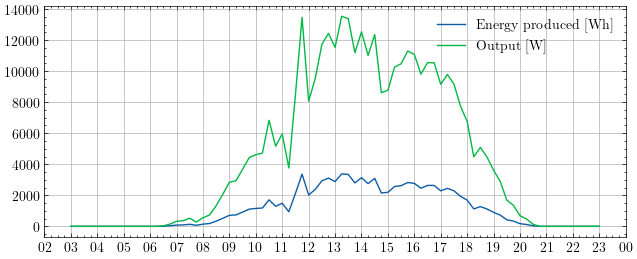

In [13]:
start = "2024-07-23 03:00:00"
end = "2024-07-23 23:00:00"

# plot energy produced Wh and output W on the same axis
fig, ax = plt.subplots(figsize=(FIG_WIDTH, 3))
ax.plot(converted[start:end].index, converted["energy-produced-Wh"][start:end], label="energy-produced-Wh")
ax.plot(converted[start:end].index, converted["output-W"][start:end], label="output-W")
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.grid()
plt.legend(["Energy produced [Wh]", "Output [W]"])
# plt.yscale('log')
plt.show()

# resampling / interpolation

When **upsampling** is performed on a sequence of samples of a signal, it produces an approximation of the sequence that would have been obtained by sampling the signal at a higher rate. [[Wikipedia]](https://en.wikipedia.org/wiki/Upsampling)

In [14]:
# Adjust the original DataFrame
interpolated_df = stg_werkhof[["datetime", "Additional Energy Export"]].copy()
interpolated_df.columns = ["datetime", "energy-produced-Wh"]
interpolated_df.sort_values("datetime", inplace=True)
interpolated_df.reset_index(inplace=True, drop=True)

In [15]:
interpolated_df.columns = ["to", "energy-produced-Wh"]
interpolated_df["from"] = interpolated_df["to"].shift(1)
interpolated_df.loc[0, "from"] = interpolated_df.loc[0, "to"] - dt.timedelta(minutes=15)

In [16]:
interpolated_df["energy-produced-Wh"] /= 3

In [17]:
# Repeat rows three times to create 5-minute intervals
repeated_values = interpolated_df.loc[interpolated_df.index.repeat(3)].reset_index(drop=True)

# Generate 5-minute intervals for each repeated row
repeated_values["from"] = [
    row["from"] + pd.Timedelta(minutes=5 * i)
    for _, row in interpolated_df.iterrows()
    for i in range(3)
]
repeated_values["to"] = repeated_values["from"] + pd.Timedelta(minutes=5)

# Align to 10-minute intervals and aggregate
repeated_values["from"] = repeated_values["from"].dt.floor("10min")
interpolated_df = (
    repeated_values.groupby("from", as_index=False)
    .agg({"energy-produced-Wh": "sum"})
)

interpolated_df["to"] = interpolated_df["from"] + pd.Timedelta(minutes=10)
interpolated_df = interpolated_df[["from", "to", "energy-produced-Wh"]]
interpolated_df[47:54]

,from,to,energy-produced-Wh
47,2023-01-01 07:50:00,2023-01-01 08:00:00,0.000000
48,2023-01-01 08:00:00,2023-01-01 08:10:00,0.000667
49,2023-01-01 08:10:00,2023-01-01 08:20:00,6.655667
50,2023-01-01 08:20:00,2023-01-01 08:30:00,13.310667
51,2023-01-01 08:30:00,2023-01-01 08:40:00,48.464667
52,2023-01-01 08:40:00,2023-01-01 08:50:00,63.628333
53,2023-01-01 08:50:00,2023-01-01 09:00:00,78.792000


In [18]:
# Check that the total energy produced is the same
np.testing.assert_allclose(converted["energy-produced-Wh"].sum(), interpolated_df["energy-produced-Wh"].sum(), atol=1e-16)

## plot

In [74]:
df = stg_werkhof[(stg_werkhof['datetime'] >= "2023-01-01 06:00:00") & (stg_werkhof['datetime'] <= "2025-03-12 12:00:00")].copy()
df2 = interpolated_df[(interpolated_df['to'] >= "2023-01-01 06:00:00") & (interpolated_df['to'] <= "2025-03-12 12:00:00")].copy()

df.sort_values(by='datetime', inplace=True)
df2.sort_values(by='to', inplace=True)

x1s = df["datetime"]
x2s = df2["to"]

y1 = df["Additional Energy Export"]
y2 = df2["energy-produced-Wh"]

sum_y1 = y1.sum()
sum_y2 = y2.sum()

print(f"Sum of Ground Truth (15 min): {sum_y1}")
print(f"Sum of Resampled (10 min) and Interpolated: {sum_y2}")

if abs(sum_y1 - sum_y2) < 10e-16:  # Small tolerance for floating-point precision
    print("The total areas (sum of values) are approximately equal.")
else:
    print("The total areas (sum of values) are NOT equal.")

Sum of Ground Truth (15 min): 37068871.032000005
Sum of Resampled (10 min) and Interpolated: 37068871.032000005
The total areas (sum of values) are approximately equal.


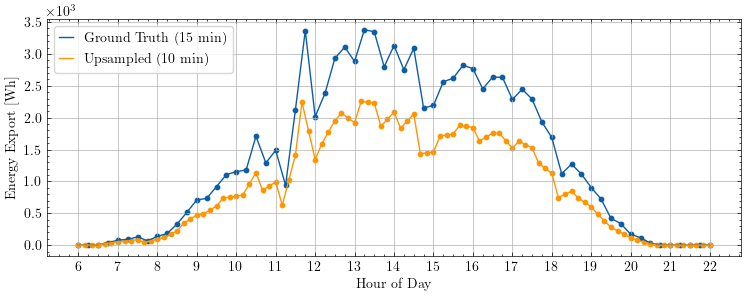

In [20]:
fig = plt.figure(figsize=(FIG_WIDTH, 3))

plt.plot(x1s, y1, label='Ground Truth (15 min)', color=sns.color_palette()[0])
plt.plot(x2s, y2, label='Upsampled (10 min)', color=sns.color_palette()[2])

plt.scatter(x1s, y1, s=10, color=sns.color_palette()[0])
plt.scatter(x2s, y2, s=10, color=sns.color_palette()[2])

plt.xlabel('Hour of Day')
plt.ylabel('Energy Export [Wh]')
# plt.title('Additional Energy Export')

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(mdates.num2date(x).hour)))

plt.legend(frameon=True, loc='upper left', handlelength=1, handleheight=1, fontsize=10)

plt.grid()
ax.set_axisbelow(True)

plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/pv-interpolation.png", dpi=300)
plt.show()

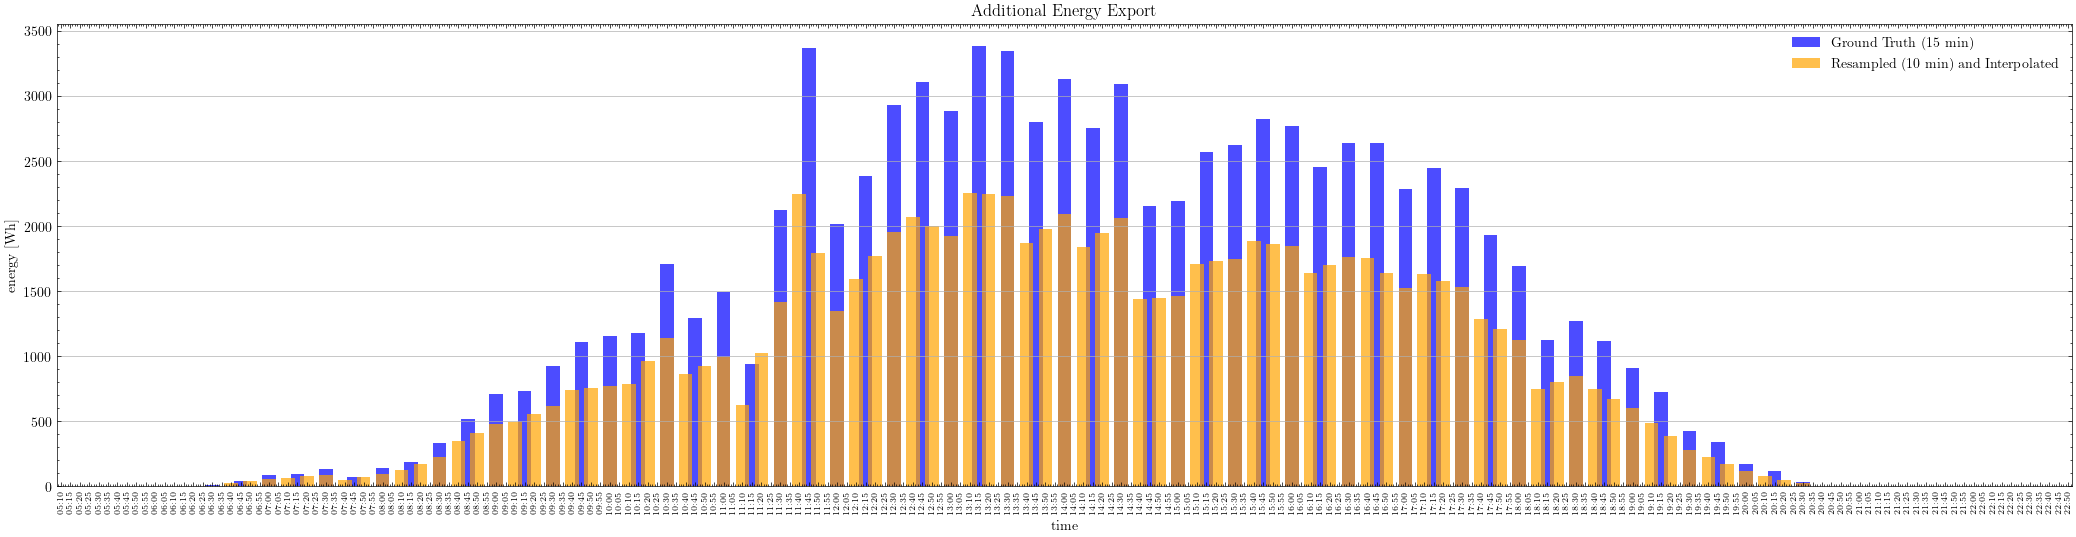

In [21]:
fig = plt.figure(figsize=(26, 6))
ax = fig.add_subplot(1,1,1)

# Bar plots for both datasets
ax.bar(x1s, y1, width=0.005, label='Ground Truth (15 min)', color='blue', alpha=0.7)
ax.bar(x2s, y2, width=0.005, label='Resampled (10 min) and Interpolated', color='orange', alpha=0.7)

plt.legend()
plt.xlabel('time')
plt.ylabel('energy [Wh]')
plt.title('Additional Energy Export')
plt.grid(axis='y')
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,5,10,15,20,25,30,35,40,45,50,55])) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(fontsize=6, rotation=90)

plt.show()


In [22]:
maxval = interpolated_df["energy-produced-Wh"].max()
print(f"The maximum value is {round(maxval, 2)} Wh, which is {round(maxval / 1000, 2)} kWh")

The maximum value is 2819.59 Wh, which is 2.82 kWh


`.localize()` takes a naive datetime object and interprets it as if it is in that timezone. It does not move the time to another timezone. A naive datetime object has no timezone information to be able to make that move possible.

In [23]:
interpolated_df["to"] = interpolated_df["to"].apply(lambda x: pytz.timezone("Europe/Zurich").localize(x))
interpolated_df["from"] = interpolated_df["from"].apply(lambda x: pytz.timezone("Europe/Zurich").localize(x))

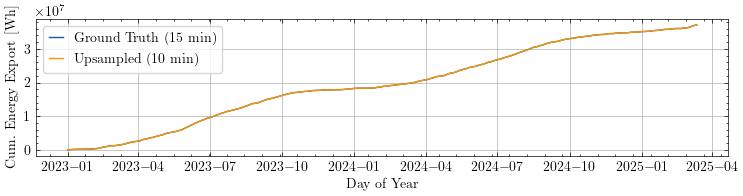

In [79]:
df = stg_werkhof[(stg_werkhof['datetime'] >= "2023-01-01 06:00:00") & (stg_werkhof['datetime'] <= "2025-03-12 12:00:00")].copy()
df2 = interpolated_df[(interpolated_df['to'] >= "2023-01-01 06:00:00") & (interpolated_df['to'] <= "2025-03-12 12:00:00")].copy()

df = df.groupby(df['datetime'].dt.date)["Additional Energy Export"].sum()
df2 = df2.groupby(df2['to'].dt.date)["energy-produced-Wh"].sum()

# plot the two dataframes cumsum over time
fig, ax = plt.subplots(figsize=(FIG_WIDTH, 2))


ax.plot(df.index, df.cumsum(), label='Ground Truth (15 min)', color=sns.color_palette()[0])
ax.plot(df2.index, df2.cumsum(), label='Upsampled (10 min)', color=sns.color_palette()[2])

plt.xlabel('Day of Year')
plt.ylabel('Cum. Energy Export [Wh]')
# plt.title('Additional Energy Export')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
# increase y tick frequency
ax.yaxis.set_major_locator(ticker.MultipleLocator(10000000))

plt.legend(frameon=True, loc='upper left', handlelength=1, handleheight=1, fontsize=10)
plt.grid()
ax.set_axisbelow(True)
plt.tight_layout(pad=0.5)
plt.savefig(f"{TARGET_FOLDER}/pv-interpolation-cumsum.png", dpi=300)
plt.show()


In [58]:
# interpolated_df.to_csv('../data/poc_multiple/stg-werkhof-interpolated-total.csv', sep=';', encoding='utf-8', index=False)